# notes

trigger delay on this setup is 58.98 ns
led flashing at 10Hz for 500 nanoseconds 
SiPM bias and threshold set to 0 Hz with LED off


run 38:
    1 Hz LED flashing just above SiPM threshold
    1 minute
    A delay 0
    B delay 500 ns
run 39:
    1 Hz LED flashing just above SiPM threshold
    10 minute    
    A delay 0
    B delay 500 ns
    
run 40:
    100 Hz LED flashing just above SiPM threshold
    1 minute    
    A delay 0
    B delay 500 ns
    

In [8]:
import os

In [10]:
test = 'COLORS'
print(os.environ[f'LS{test}'])

ExFxBxDxCxegedabagacad


In [1]:
from udaq_decoder import udaqChargestamps
import matplotlib.pyplot as plt
#from datetime import datetime
import datetime
import time
import pandas as pd


In [2]:
def read_json(fileName):
    jsonFile = open(fileName+".json")

    inList = jsonFile.readlines()

    for i in range(len(inList)):
        thresh = inList[i].split(',')
        print(thresh[0])
        #print(i)
        if(i ==7):
            #print(thresh[0])
            dateStr = str(thresh[0].split()[1].strip('\"'))
            #print(dateStr)
            date_object = datetime.datetime.strptime(dateStr, '%Y-%m-%d').date()
            #print(date_object)
        if(i ==8):
            #print(thresh[0].split()[1])
            timeStr = str(thresh[0].split()[1]).strip('\"')
            #print(timeStr)
            time_object = datetime.datetime.strptime(timeStr, '%H:%M:%S')
            #print(time_object)

        if("udaq_time" in thresh[0]):
            #print(thresh[0])
            #print(int(thresh[0].split()[2]))
            num = [int(x) for x in thresh[0].split()[3] if x.isdigit()]
            microSecond = float(''.join(map(str, num)))
            uDAQStartTime = float(thresh[0].split()[2])+(microSecond/1e6)
    print(uDAQStartTime)
    return [str(date_object),str(time_object.time()), uDAQStartTime]

In [3]:
myString = 'run_0000040'
runString = f'{myString}'
jsonList = read_json(runString)

{

    "subruntime": 60
    "runtime": 10
    "uid": "240045 48535005 20353041"
    "temperature": 297.9062
    "voltage": 2600
    "threshold": 2200
    "date": "2023-12-19"
    "time": "17:08:38"
    "udaq_time": "0 1742 428406"
    "subruns": 1
    "trigrate": 101.0

}
1742.428406


In [13]:
jsonList

['2023-12-19', '17:08:38', 1742.428406]

In [11]:
hits = udaqChargestamps(runString+".bin",0,0,0,0)

In [12]:
for i in hits:
    print(i)

[1742.6397042340277, 4095, 3564, 0, 0]
[1742.6497039680555, 4095, 3572, 0, 0]
[1742.6597043333334, 4095, 3553, 0, 0]
[1742.6697044055556, 4095, 3552, 0, 0]
[1742.679703277778, 4095, 3549, 0, 0]
[1742.689703223611, 4095, 3567, 0, 0]
[1742.6997028541666, 4095, 3586, 0, 0]
[1742.7097031583332, 4095, 3569, 0, 0]
[1742.71970214375, 4095, 3585, 0, 0]
[1742.7297012048612, 4095, 3576, 0, 0]
[1742.7397022409723, 4095, 3573, 0, 0]
[1742.74970226875, 4095, 3574, 0, 0]
[1742.7597029381946, 4095, 3586, 0, 0]
[1742.769702938889, 4095, 3560, 0, 0]
[1742.779703075, 4095, 3572, 0, 0]
[1742.7897027395834, 4095, 3571, 0, 0]
[1742.7997042597221, 4095, 3577, 0, 0]
[1742.809702738889, 4095, 3564, 0, 0]
[1742.8197017465277, 4095, 3561, 0, 0]
[1742.8297013055555, 4095, 3560, 0, 0]
[1742.83970113125, 4095, 3579, 0, 0]
[1742.8497019020833, 4095, 3562, 0, 0]
[1742.8597023472223, 4095, 3571, 0, 0]
[1742.8697019763888, 4095, 3574, 0, 0]
[1742.8797016222222, 4095, 3557, 0, 0]
[1742.8897013916667, 4095, 3572, 0, 0]


In [6]:
timeList = []
plotList = []
for i in hits:
    #print(i[0])
    
    plotList.append(i[0])
    if i[4] ==0:
        #print(i[0])
        
        timeList.append(float('%.9f' % i[0])*1e9 )

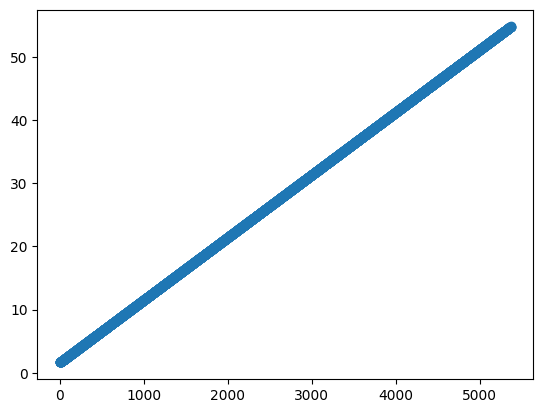

In [7]:
plt.scatter(range(0,len(plotList)),plotList)

In [8]:
diffList =[]
for n,i in enumerate(timeList):
    if n>0:
        diffList.append((i - timeList[n-1])-1e7)

In [1]:
1400/29

48.275862068965516

In [9]:
diffList

[-266.0,
 365.0,
 73.0,
 -1128.0,
 -54.0,
 -370.0,
 304.0,
 -1014.0,
 -939.0,
 1036.0,
 28.0,
 669.0,
 1.0,
 136.0,
 -335.0,
 1520.0,
 -1521.0,
 -992.0,
 -441.0,
 -175.0,
 771.0,
 445.0,
 -371.0,
 -354.0,
 -230.0,
 2180.0,
 -1222.0,
 -786.0,
 -1022.0,
 152.0,
 -23.0,
 -3.0,
 -18.0,
 303.0,
 -263.0,
 962.0,
 1283.0,
 -1029.0000002384186,
 -847.9999997615814,
 -783.0,
 -598.0,
 -424.9999997615814,
 -876.0000004768372,
 -2359.0,
 -140.99999976158142,
 939.9999997615814,
 488.0000002384186,
 813.0,
 1505.0,
 1610.9999997615814,
 468.0000002384186,
 -611.0,
 -573.0,
 -77.0,
 177.0,
 -323.0,
 -44.0,
 -117.0,
 -197.0,
 -928.0,
 -559.0,
 -670.0,
 -701.0,
 -950.0,
 161.0,
 1544.0,
 1028.0,
 517.0,
 449.0,
 212.0,
 -1145.0,
 -486.0,
 -1400.0,
 -819.0,
 494.0,
 1228.0,
 1890.0,
 -618.0,
 -1491.0,
 -509.0,
 -503.0,
 -402.0,
 72.0,
 700.0,
 954.0,
 587.0,
 -235.0,
 378.0,
 -828.0,
 -92.0,
 -764.0,
 -1690.0,
 -620.0,
 1222.0,
 1487.0,
 607.0,
 -594.0,
 -101.0,
 -444.0,
 226.0,
 285.0,
 -384.0,
 -450

 mean -75.0 ns std dev 901.0 ns


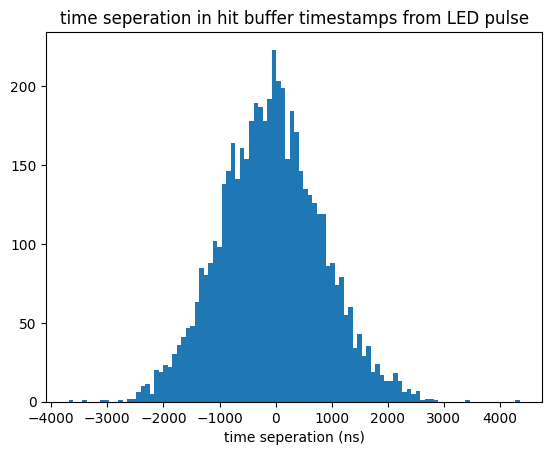

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


plt.hist(diffList,bins=100)
plt.title("time seperation in hit buffer timestamps from LED pulse")
plt.xlabel("time seperation (ns)")
mean,std = norm.fit(diffList)

print(f' mean {mean.round(0)} ns std dev {std.round(0)} ns')

-74.79360301034806 901.1184795167221


In [265]:
import subprocess
from subprocess import PIPE, Popen

def cmdline(command):
    process = Popen(
        args=command,
        stdout=subprocess.PIPE,
        shell=True
    )
    process.wait()
    return process.communicate()

In [64]:
def read_bin(fileName, jsonList):
    time_object = datetime.datetime.strptime(jsonList[1], '%H:%M:%S.%f')
    date_object = datetime.datetime.strptime(jsonList[0], '%Y-%m-%d').date()
    hits = udaqChargestamps(fileName+".bin")
    times = []
    daqTime=[]
    adc1 = []
    adc2 = []
    adc3 = []
    hitCounter = 0
    print(time_object.time())
    #print(jsonList[2])
    for n,hit in enumerate(hits):
        if not hit[4]:
            hitCounter+=1
        daqTimeAdjust = hit[0] - jsonList[2]
        
        #print(hit[0],hit[4])
        eventDateTime = (time_object+datetime.timedelta(seconds = daqTimeAdjust)).time() 
        #p0List.append([eventDateTime])
        #p0List[n].extend(hit[1:])
        times.append(str(eventDateTime))
        daqTime.append(daqTimeAdjust)
        adc1.append(hit[1])
        adc2.append(hit[2])
        adc3.append(hit[4])


    data = {'Event Times':times,
            'adc 1':adc1,'adc 2':adc2,
            'DAQ Time':daqTime,
            'CPU trigger Flag':adc3}

    df = pd.DataFrame(data)
    #df.columns=pd.MultiIndex.from_product([[f'panel N date {date_object}']])

    #display(df)



    print(f'total hits including CPU triggers = {len(hits)} \nnon-CPU trigger hits = {hitCounter}\n')
    return df

#testing panda frame

run=1

##port 0
runStringP0 = "runs/port_0_run_000000"+str(run)+"/port_0_run_000000"+str(run)

jsonListPort0 = read_json(runStringP0)
#print(jsonListPanel1)
dfPort0 = read_bin(runStringP0,jsonListPort0)
display(dfPort0)


#port 1
runStringP1 = "runs/port_1_run_000000"+str(run)+"/port_1_run_000000"+str(run)
jsonListPort1 = read_json(runStringP1)
#print(jsonListPanel1)
dfPort1 = read_bin(runStringP1,jsonListPort1)
display(dfPort1)

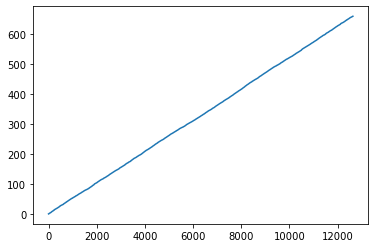

In [182]:
plt.plot(dfPort0['DAQ Time'])

In [194]:
## Read coincident test files

run=1
runTime = 10
meterSeperation = 0

##port 0
runStringP0 = f'{runTime}minute/port_0_{meterSeperation}meterSeperation'
#runStringP0 = "port_0_run_000000"+str(run)

jsonListPort0 = read_json(runStringP0)
#print(jsonListPanel1)
dfPort0 = read_bin(runStringP0,jsonListPort0)
display(dfPort0)

#port 1
runStringP1 = f'{runTime}minute/port_1_{meterSeperation}meterSeperation'
#runStringP1 = "port_1_run_000000"+str(run)
jsonListPort1 = read_json(runStringP1)
#print(jsonListPanel1)
dfPort1 = read_bin(runStringP1,jsonListPort1)
display(dfPort1)

{

    "subruntime": 6
    "runtime": 600
    "uid": "240045 48535005 20353041"
    "temperature": 294.9375
    "voltage": 2600
    "threshold": 1700
    "date": "2023-04-14"
    "time": "17:39:05:088275"
    "udaq_time": "0 53 943051"
    "subruns": 100

}
53.943051
17:39:05.088275
total hits including CPU triggers = 15469 
non-CPU trigger hits = 14848



,Event Times,adc 1,adc 2,DAQ Time,CPU trigger Flag
0,17:39:05.585058,771,28,0.496783,0
1,17:39:05.603744,768,28,0.515469,0
2,17:39:05.625711,1034,40,0.537436,0
3,17:39:05.649372,739,27,0.561097,0
4,17:39:05.652139,1107,42,0.563864,0
...,...,...,...,...,...
15464,17:50:05.635943,815,30,660.547668,0
15465,17:50:05.705069,777,29,660.616794,0
15466,17:50:05.744927,794,29,660.656652,0
15467,17:50:05.747902,713,26,660.659627,0


{

    "subruntime": 6
    "runtime": 600
    "uid": "240004 48535005 20353041"
    "temperature": 295.1875
    "voltage": 2600
    "threshold": 1570
    "date": "2023-04-14"
    "time": "17:39:05:088275"
    "udaq_time": "0 19 643944"
    "subruns": 100

}
19.643944
17:39:05.088275
total hits including CPU triggers = 14389 
non-CPU trigger hits = 13771



,Event Times,adc 1,adc 2,DAQ Time,CPU trigger Flag
0,17:39:05.527569,561,21,0.439294,0
1,17:39:05.569483,581,22,0.481208,0
2,17:39:05.583661,545,21,0.495386,0
3,17:39:05.658412,621,23,0.570137,0
4,17:39:05.716411,751,29,0.628136,0
...,...,...,...,...,...
14384,17:50:05.583152,609,23,660.494877,0
14385,17:50:05.703660,572,22,660.615385,0
14386,17:50:05.714078,576,21,660.625803,0
14387,17:50:05.780641,543,21,660.692366,0


In [195]:
import time
start_time = time.time()




coincidentTime = 50
coincidenceList = []
lastJCount = 0
for i in range(len(dfPort0)):
#for i in range(1000):
    evTime = datetime.datetime.strptime(dfPort0.iloc[i, 0], '%H:%M:%S.%f')
    #print(evTime.time())
    if (lastJCount - 100 <0. ):
        lastJCount = 100
        #print('here')
    for j in range(lastJCount-100, len(dfPort1)):
        ev2Time = datetime.datetime.strptime(dfPort1.iloc[j, 0], '%H:%M:%S.%f')

            #ev2Time = datetime.datetime.strptime(dfPort1.iloc[i+j, 0], '%H:%M:%S.%f')
            #print(evTime.time(), ev2Time.time())
            #if( evTime + datetime.timedelta(microseconds = coincidentTime) < ev2Time):
            #    print(evTime.time(), ev2Time.time())
        timeDiff = abs(evTime-ev2Time)
        
        if timeDiff < datetime.timedelta(microseconds= coincidentTime):
            print('coincidence',timeDiff, evTime.time(), ev2Time.time())
            coincidenceList.append(timeDiff)
        #print(abs(evTime-ev2Time))
        if(ev2Time > evTime + datetime.timedelta(microseconds = coincidentTime*2)):
            lastJCount = j
            #print(lastJCount)
            #print('over')
            break
            
print("--- %s seconds ---" % (time.time() - start_time))

coincidence 0:00:00.000002 17:39:05.658410 17:39:05.658412
coincidence 0:00:00.000002 17:39:05.716409 17:39:05.716411
coincidence 0:00:00.000003 17:39:05.832884 17:39:05.832887
coincidence 0:00:00.000002 17:39:05.889956 17:39:05.889958
coincidence 0:00:00.000002 17:39:05.963378 17:39:05.963380
coincidence 0:00:00.000003 17:39:06.179585 17:39:06.179588
coincidence 0:00:00.000003 17:39:06.248682 17:39:06.248685
coincidence 0:00:00.000002 17:39:06.356698 17:39:06.356700
coincidence 0:00:00.000003 17:39:06.551722 17:39:06.551725
coincidence 0:00:00.000002 17:39:06.575244 17:39:06.575246
coincidence 0:00:00.000003 17:39:06.814534 17:39:06.814537
coincidence 0:00:00.000002 17:39:07.036800 17:39:07.036802
coincidence 0:00:00.000002 17:39:07.099694 17:39:07.099696
coincidence 0:00:00.000002 17:39:07.112248 17:39:07.112250
coincidence 0:00:00.000002 17:39:07.253319 17:39:07.253321
coincidence 0:00:00.000003 17:39:07.332798 17:39:07.332801
coincidence 0:00:00.000003 17:39:07.624263 17:39:07.6242

coincidence 0:00:00.000002 17:39:23.157472 17:39:23.157474
coincidence 0:00:00.000002 17:39:23.172908 17:39:23.172910
coincidence 0:00:00.000002 17:39:23.496477 17:39:23.496479
coincidence 0:00:00.000003 17:39:23.514146 17:39:23.514149
coincidence 0:00:00.000002 17:39:23.558125 17:39:23.558127
coincidence 0:00:00.000002 17:39:23.634092 17:39:23.634094
coincidence 0:00:00.000003 17:39:23.832214 17:39:23.832217
coincidence 0:00:00.000002 17:39:24.238251 17:39:24.238253
coincidence 0:00:00.000002 17:39:24.456982 17:39:24.456984
coincidence 0:00:00.000003 17:39:24.559761 17:39:24.559764
coincidence 0:00:00.000002 17:39:24.611802 17:39:24.611804
coincidence 0:00:00.000002 17:39:24.719946 17:39:24.719948
coincidence 0:00:00.000002 17:39:24.763414 17:39:24.763416
coincidence 0:00:00.000002 17:39:24.899825 17:39:24.899827
coincidence 0:00:00.000002 17:39:25.565509 17:39:25.565511
coincidence 0:00:00.000040 17:39:25.565551 17:39:25.565511
coincidence 0:00:00.000003 17:39:25.652157 17:39:25.6521

coincidence 0:00:00.000002 17:39:41.954340 17:39:41.954342
coincidence 0:00:00.000002 17:39:42.030823 17:39:42.030825
coincidence 0:00:00.000002 17:39:42.134553 17:39:42.134555
coincidence 0:00:00.000003 17:39:42.151055 17:39:42.151058
coincidence 0:00:00.000003 17:39:42.173000 17:39:42.173003
coincidence 0:00:00.000002 17:39:42.200370 17:39:42.200372
coincidence 0:00:00.000003 17:39:42.221841 17:39:42.221844
coincidence 0:00:00.000030 17:39:42.498077 17:39:42.498107
coincidence 0:00:00.000003 17:39:42.498104 17:39:42.498107
coincidence 0:00:00.000002 17:39:42.548578 17:39:42.548580
coincidence 0:00:00.000002 17:39:42.632499 17:39:42.632501
coincidence 0:00:00.000002 17:39:42.782392 17:39:42.782394
coincidence 0:00:00.000002 17:39:42.916095 17:39:42.916097
coincidence 0:00:00.000002 17:39:43.149715 17:39:43.149717
coincidence 0:00:00.000002 17:39:43.188795 17:39:43.188797
coincidence 0:00:00.000003 17:39:43.421109 17:39:43.421112
coincidence 0:00:00.000002 17:39:43.471133 17:39:43.4711

coincidence 0:00:00.000002 17:40:00.191177 17:40:00.191179
coincidence 0:00:00.000002 17:40:00.283695 17:40:00.283697
coincidence 0:00:00.000002 17:40:00.400881 17:40:00.400883
coincidence 0:00:00.000002 17:40:00.745895 17:40:00.745897
coincidence 0:00:00.000002 17:40:01.103240 17:40:01.103242
coincidence 0:00:00.000002 17:40:01.117273 17:40:01.117275
coincidence 0:00:00.000002 17:40:01.180088 17:40:01.180090
coincidence 0:00:00.000002 17:40:01.617934 17:40:01.617936
coincidence 0:00:00.000003 17:40:01.695678 17:40:01.695681
coincidence 0:00:00.000003 17:40:01.758158 17:40:01.758161
coincidence 0:00:00.000002 17:40:01.867497 17:40:01.867499
coincidence 0:00:00.000002 17:40:01.983417 17:40:01.983419
coincidence 0:00:00.000002 17:40:01.986037 17:40:01.986039
coincidence 0:00:00.000002 17:40:02.098488 17:40:02.098490
coincidence 0:00:00.000003 17:40:02.104199 17:40:02.104202
coincidence 0:00:00.000003 17:40:02.205926 17:40:02.205929
coincidence 0:00:00.000002 17:40:02.224192 17:40:02.2241

coincidence 0:00:00.000002 17:40:18.765112 17:40:18.765114
coincidence 0:00:00.000003 17:40:18.902598 17:40:18.902601
coincidence 0:00:00.000002 17:40:19.129498 17:40:19.129500
coincidence 0:00:00.000003 17:40:19.174945 17:40:19.174948
coincidence 0:00:00.000003 17:40:19.249926 17:40:19.249929
coincidence 0:00:00.000002 17:40:19.436223 17:40:19.436225
coincidence 0:00:00.000003 17:40:20.336361 17:40:20.336364
coincidence 0:00:00.000002 17:40:20.368027 17:40:20.368029
coincidence 0:00:00.000002 17:40:20.386426 17:40:20.386428
coincidence 0:00:00.000002 17:40:20.542815 17:40:20.542817
coincidence 0:00:00.000003 17:40:20.589657 17:40:20.589660
coincidence 0:00:00.000002 17:40:20.966669 17:40:20.966671
coincidence 0:00:00.000002 17:40:21.015446 17:40:21.015448
coincidence 0:00:00.000003 17:40:21.117456 17:40:21.117459
coincidence 0:00:00.000002 17:40:21.156501 17:40:21.156503
coincidence 0:00:00.000002 17:40:21.177322 17:40:21.177324
coincidence 0:00:00.000002 17:40:21.398179 17:40:21.3981

coincidence 0:00:00.000002 17:40:36.838531 17:40:36.838533
coincidence 0:00:00.000002 17:40:37.074825 17:40:37.074827
coincidence 0:00:00.000003 17:40:37.215031 17:40:37.215034
coincidence 0:00:00.000002 17:40:37.342403 17:40:37.342405
coincidence 0:00:00.000002 17:40:38.210932 17:40:38.210934
coincidence 0:00:00.000002 17:40:38.266721 17:40:38.266723
coincidence 0:00:00.000002 17:40:38.337349 17:40:38.337351
coincidence 0:00:00.000003 17:40:38.363660 17:40:38.363663
coincidence 0:00:00.000002 17:40:38.380300 17:40:38.380302
coincidence 0:00:00.000003 17:40:38.445996 17:40:38.445999
coincidence 0:00:00.000002 17:40:39.047630 17:40:39.047632
coincidence 0:00:00.000002 17:40:39.213630 17:40:39.213632
coincidence 0:00:00.000002 17:40:39.334921 17:40:39.334923
coincidence 0:00:00.000003 17:40:39.367293 17:40:39.367296
coincidence 0:00:00.000002 17:40:39.382379 17:40:39.382381
coincidence 0:00:00.000003 17:40:39.386326 17:40:39.386329
coincidence 0:00:00.000003 17:40:39.552052 17:40:39.5520

coincidence 0:00:00.000003 17:40:53.587463 17:40:53.587466
coincidence 0:00:00.000002 17:40:53.909643 17:40:53.909645
coincidence 0:00:00.000002 17:40:54.034731 17:40:54.034733
coincidence 0:00:00.000002 17:40:54.132636 17:40:54.132638
coincidence 0:00:00.000003 17:40:54.196343 17:40:54.196346
coincidence 0:00:00.000002 17:40:54.333892 17:40:54.333894
coincidence 0:00:00.000002 17:40:54.910795 17:40:54.910797
coincidence 0:00:00.000002 17:40:55.022496 17:40:55.022498
coincidence 0:00:00.000002 17:40:55.155846 17:40:55.155848
coincidence 0:00:00.000002 17:40:55.341949 17:40:55.341951
coincidence 0:00:00.000002 17:40:55.361243 17:40:55.361245
coincidence 0:00:00.000002 17:40:55.404830 17:40:55.404832
coincidence 0:00:00.000003 17:40:55.525576 17:40:55.525579
coincidence 0:00:00.000002 17:40:55.579354 17:40:55.579356
coincidence 0:00:00.000002 17:40:55.673450 17:40:55.673452
coincidence 0:00:00.000002 17:40:55.712331 17:40:55.712333
coincidence 0:00:00.000002 17:40:55.840255 17:40:55.8402

coincidence 0:00:00.000002 17:41:13.294532 17:41:13.294534
coincidence 0:00:00.000003 17:41:13.372574 17:41:13.372577
coincidence 0:00:00.000003 17:41:13.422240 17:41:13.422243
coincidence 0:00:00.000002 17:41:13.425780 17:41:13.425782
coincidence 0:00:00.000002 17:41:13.456916 17:41:13.456918
coincidence 0:00:00.000003 17:41:13.461455 17:41:13.461458
coincidence 0:00:00.000003 17:41:13.503924 17:41:13.503927
coincidence 0:00:00.000002 17:41:13.744111 17:41:13.744113
coincidence 0:00:00.000002 17:41:13.843213 17:41:13.843215
coincidence 0:00:00.000002 17:41:14.090428 17:41:14.090430
coincidence 0:00:00.000003 17:41:14.162794 17:41:14.162797
coincidence 0:00:00.000002 17:41:14.252696 17:41:14.252698
coincidence 0:00:00.000002 17:41:14.380008 17:41:14.380010
coincidence 0:00:00.000002 17:41:14.385546 17:41:14.385548
coincidence 0:00:00.000003 17:41:14.434864 17:41:14.434867
coincidence 0:00:00.000003 17:41:14.764789 17:41:14.764792
coincidence 0:00:00.000003 17:41:14.862342 17:41:14.8623

coincidence 0:00:00.000012 17:41:34.541190 17:41:34.541178
coincidence 0:00:00.000002 17:41:34.618927 17:41:34.618929
coincidence 0:00:00.000002 17:41:38.455230 17:41:38.455232
coincidence 0:00:00.000003 17:41:38.459728 17:41:38.459731
coincidence 0:00:00.000003 17:41:38.512229 17:41:38.512232
coincidence 0:00:00.000002 17:41:38.912793 17:41:38.912795
coincidence 0:00:00.000003 17:41:38.993469 17:41:38.993472
coincidence 0:00:00.000003 17:41:39.134100 17:41:39.134103
coincidence 0:00:00.000002 17:41:39.269804 17:41:39.269806
coincidence 0:00:00.000002 17:41:39.354116 17:41:39.354118
coincidence 0:00:00.000002 17:41:39.504596 17:41:39.504598
coincidence 0:00:00.000002 17:41:39.539052 17:41:39.539054
coincidence 0:00:00.000002 17:41:39.664954 17:41:39.664956
coincidence 0:00:00.000002 17:41:39.838308 17:41:39.838310
coincidence 0:00:00.000002 17:41:39.888175 17:41:39.888177
coincidence 0:00:00.000002 17:41:40.091888 17:41:40.091890
coincidence 0:00:00.000002 17:41:40.191034 17:41:40.1910

coincidence 0:00:00.000002 17:41:57.414752 17:41:57.414754
coincidence 0:00:00.000002 17:41:57.699725 17:41:57.699727
coincidence 0:00:00.000003 17:41:58.081478 17:41:58.081481
coincidence 0:00:00.000003 17:41:58.180759 17:41:58.180762
coincidence 0:00:00.000003 17:41:58.452154 17:41:58.452157
coincidence 0:00:00.000003 17:41:58.467960 17:41:58.467963
coincidence 0:00:00.000002 17:41:58.553903 17:41:58.553905
coincidence 0:00:00.000003 17:41:58.578996 17:41:58.578999
coincidence 0:00:00.000003 17:41:58.595504 17:41:58.595507
coincidence 0:00:00.000002 17:41:58.626811 17:41:58.626813
coincidence 0:00:00.000002 17:41:58.658916 17:41:58.658918
coincidence 0:00:00.000002 17:41:58.757590 17:41:58.757592
coincidence 0:00:00.000002 17:41:58.796722 17:41:58.796724
coincidence 0:00:00.000002 17:41:58.900681 17:41:58.900683
coincidence 0:00:00.000003 17:41:58.938067 17:41:58.938070
coincidence 0:00:00.000002 17:41:59.063464 17:41:59.063466
coincidence 0:00:00.000002 17:41:59.089867 17:41:59.0898

coincidence 0:00:00.000003 17:42:15.529073 17:42:15.529076
coincidence 0:00:00.000002 17:42:15.675337 17:42:15.675339
coincidence 0:00:00.000002 17:42:15.786852 17:42:15.786854
coincidence 0:00:00.000002 17:42:15.861784 17:42:15.861786
coincidence 0:00:00.000002 17:42:16.022246 17:42:16.022248
coincidence 0:00:00.000003 17:42:16.085395 17:42:16.085398
coincidence 0:00:00.000003 17:42:16.113687 17:42:16.113690
coincidence 0:00:00.000002 17:42:16.115152 17:42:16.115154
coincidence 0:00:00.000003 17:42:16.151367 17:42:16.151370
coincidence 0:00:00.000003 17:42:16.204477 17:42:16.204480
coincidence 0:00:00.000002 17:42:16.434909 17:42:16.434911
coincidence 0:00:00.000003 17:42:16.597623 17:42:16.597626
coincidence 0:00:00.000002 17:42:16.642643 17:42:16.642645
coincidence 0:00:00.000002 17:42:17.243803 17:42:17.243805
coincidence 0:00:00.000002 17:42:17.307518 17:42:17.307520
coincidence 0:00:00.000002 17:42:17.460145 17:42:17.460147
coincidence 0:00:00.000002 17:42:17.513610 17:42:17.5136

coincidence 0:00:00.000002 17:42:35.950404 17:42:35.950406
coincidence 0:00:00.000002 17:42:36.275717 17:42:36.275719
coincidence 0:00:00.000002 17:42:36.301072 17:42:36.301074
coincidence 0:00:00.000003 17:42:37.029658 17:42:37.029661
coincidence 0:00:00.000002 17:42:37.132857 17:42:37.132859
coincidence 0:00:00.000003 17:42:37.185553 17:42:37.185556
coincidence 0:00:00.000003 17:42:37.273960 17:42:37.273963
coincidence 0:00:00.000002 17:42:37.424373 17:42:37.424375
coincidence 0:00:00.000002 17:42:37.522813 17:42:37.522815
coincidence 0:00:00.000002 17:42:37.746531 17:42:37.746533
coincidence 0:00:00.000002 17:42:37.749051 17:42:37.749053
coincidence 0:00:00.000002 17:42:37.787744 17:42:37.787746
coincidence 0:00:00.000003 17:42:37.839523 17:42:37.839526
coincidence 0:00:00.000002 17:42:38.128460 17:42:38.128462
coincidence 0:00:00.000002 17:42:38.131583 17:42:38.131585
coincidence 0:00:00.000003 17:42:38.143557 17:42:38.143560
coincidence 0:00:00.000002 17:42:38.211110 17:42:38.2111

coincidence 0:00:00.000002 17:42:55.373713 17:42:55.373715
coincidence 0:00:00.000002 17:42:55.611617 17:42:55.611619
coincidence 0:00:00.000002 17:42:55.661891 17:42:55.661893
coincidence 0:00:00.000002 17:42:55.736136 17:42:55.736138
coincidence 0:00:00.000002 17:42:55.767824 17:42:55.767826
coincidence 0:00:00.000002 17:42:55.779204 17:42:55.779206
coincidence 0:00:00.000003 17:42:55.880271 17:42:55.880274
coincidence 0:00:00.000003 17:42:55.924364 17:42:55.924367
coincidence 0:00:00.000002 17:42:55.941452 17:42:55.941454
coincidence 0:00:00.000002 17:42:55.941528 17:42:55.941530
coincidence 0:00:00.000003 17:42:55.949882 17:42:55.949885
coincidence 0:00:00.000002 17:42:55.999800 17:42:55.999802
coincidence 0:00:00.000002 17:42:56.010122 17:42:56.010124
coincidence 0:00:00.000002 17:42:56.043418 17:42:56.043420
coincidence 0:00:00.000002 17:42:57.045042 17:42:57.045044
coincidence 0:00:00.000002 17:42:57.133487 17:42:57.133489
coincidence 0:00:00.000002 17:42:57.169516 17:42:57.1695

coincidence 0:00:00.000003 17:43:14.472929 17:43:14.472932
coincidence 0:00:00.000002 17:43:14.811312 17:43:14.811314
coincidence 0:00:00.000002 17:43:14.895463 17:43:14.895465
coincidence 0:00:00.000002 17:43:15.193163 17:43:15.193165
coincidence 0:00:00.000002 17:43:15.288245 17:43:15.288247
coincidence 0:00:00.000002 17:43:15.289377 17:43:15.289379
coincidence 0:00:00.000002 17:43:15.309369 17:43:15.309371
coincidence 0:00:00.000002 17:43:15.385185 17:43:15.385187
coincidence 0:00:00.000002 17:43:15.457141 17:43:15.457143
coincidence 0:00:00.000002 17:43:15.701145 17:43:15.701147
coincidence 0:00:00.000002 17:43:15.741544 17:43:15.741546
coincidence 0:00:00.000002 17:43:15.807515 17:43:15.807517
coincidence 0:00:00.000003 17:43:16.038552 17:43:16.038555
coincidence 0:00:00.000002 17:43:16.587981 17:43:16.587983
coincidence 0:00:00.000002 17:43:16.721119 17:43:16.721121
coincidence 0:00:00.000003 17:43:16.909892 17:43:16.909895
coincidence 0:00:00.000003 17:43:16.919056 17:43:16.9190

coincidence 0:00:00.000002 17:43:34.508228 17:43:34.508230
coincidence 0:00:00.000002 17:43:34.696639 17:43:34.696641
coincidence 0:00:00.000002 17:43:34.885669 17:43:34.885671
coincidence 0:00:00.000002 17:43:35.005085 17:43:35.005087
coincidence 0:00:00.000002 17:43:35.226889 17:43:35.226891
coincidence 0:00:00.000003 17:43:35.453305 17:43:35.453308
coincidence 0:00:00.000002 17:43:35.569072 17:43:35.569074
coincidence 0:00:00.000002 17:43:35.622607 17:43:35.622609
coincidence 0:00:00.000003 17:43:35.677796 17:43:35.677799
coincidence 0:00:00.000003 17:43:35.708474 17:43:35.708477
coincidence 0:00:00.000002 17:43:35.729924 17:43:35.729926
coincidence 0:00:00.000002 17:43:35.853403 17:43:35.853405
coincidence 0:00:00.000002 17:43:35.887449 17:43:35.887451
coincidence 0:00:00.000003 17:43:36.493775 17:43:36.493778
coincidence 0:00:00.000003 17:43:36.627852 17:43:36.627855
coincidence 0:00:00.000003 17:43:36.747713 17:43:36.747716
coincidence 0:00:00.000003 17:43:36.835071 17:43:36.8350

coincidence 0:00:00.000002 17:43:54.815011 17:43:54.815013
coincidence 0:00:00.000002 17:43:55.114615 17:43:55.114617
coincidence 0:00:00.000003 17:43:55.502368 17:43:55.502371
coincidence 0:00:00.000002 17:43:56.361238 17:43:56.361240
coincidence 0:00:00.000002 17:43:56.435658 17:43:56.435660
coincidence 0:00:00.000002 17:43:56.777580 17:43:56.777582
coincidence 0:00:00.000002 17:43:56.808940 17:43:56.808942
coincidence 0:00:00.000002 17:43:56.848109 17:43:56.848111
coincidence 0:00:00.000002 17:43:56.945923 17:43:56.945925
coincidence 0:00:00.000002 17:43:57.114081 17:43:57.114083
coincidence 0:00:00.000002 17:43:57.161088 17:43:57.161090
coincidence 0:00:00.000003 17:43:57.211427 17:43:57.211430
coincidence 0:00:00.000003 17:43:57.222459 17:43:57.222462
coincidence 0:00:00.000002 17:43:57.515825 17:43:57.515827
coincidence 0:00:00.000002 17:43:57.615577 17:43:57.615579
coincidence 0:00:00.000003 17:43:57.720823 17:43:57.720826
coincidence 0:00:00.000003 17:43:57.736290 17:43:57.7362

coincidence 0:00:00.000002 17:44:12.266078 17:44:12.266080
coincidence 0:00:00.000002 17:44:12.276533 17:44:12.276535
coincidence 0:00:00.000003 17:44:12.463184 17:44:12.463187
coincidence 0:00:00.000002 17:44:12.517420 17:44:12.517422
coincidence 0:00:00.000003 17:44:12.653095 17:44:12.653098
coincidence 0:00:00.000003 17:44:12.920427 17:44:12.920430
coincidence 0:00:00.000002 17:44:12.967507 17:44:12.967509
coincidence 0:00:00.000002 17:44:13.195013 17:44:13.195015
coincidence 0:00:00.000002 17:44:13.202544 17:44:13.202546
coincidence 0:00:00.000002 17:44:13.241730 17:44:13.241732
coincidence 0:00:00.000002 17:44:13.421166 17:44:13.421168
coincidence 0:00:00.000002 17:44:13.513643 17:44:13.513645
coincidence 0:00:00.000002 17:44:13.644442 17:44:13.644444
coincidence 0:00:00.000002 17:44:13.656546 17:44:13.656548
coincidence 0:00:00.000003 17:44:13.820775 17:44:13.820778
coincidence 0:00:00.000002 17:44:13.856357 17:44:13.856359
coincidence 0:00:00.000002 17:44:13.906116 17:44:13.9061

coincidence 0:00:00.000003 17:44:32.485674 17:44:32.485677
coincidence 0:00:00.000003 17:44:32.711559 17:44:32.711562
coincidence 0:00:00.000002 17:44:32.721381 17:44:32.721383
coincidence 0:00:00.000003 17:44:32.802965 17:44:32.802968
coincidence 0:00:00.000002 17:44:32.882897 17:44:32.882899
coincidence 0:00:00.000002 17:44:32.993574 17:44:32.993576
coincidence 0:00:00.000002 17:44:33.491365 17:44:33.491367
coincidence 0:00:00.000002 17:44:33.503374 17:44:33.503376
coincidence 0:00:00.000002 17:44:33.532452 17:44:33.532454
coincidence 0:00:00.000002 17:44:33.553845 17:44:33.553847
coincidence 0:00:00.000003 17:44:33.791005 17:44:33.791008
coincidence 0:00:00.000002 17:44:33.869126 17:44:33.869128
coincidence 0:00:00.000003 17:44:33.888471 17:44:33.888474
coincidence 0:00:00.000002 17:44:34.077711 17:44:34.077713
coincidence 0:00:00.000002 17:44:34.090186 17:44:34.090188
coincidence 0:00:00.000002 17:44:34.532663 17:44:34.532665
coincidence 0:00:00.000002 17:44:34.782051 17:44:34.7820

coincidence 0:00:00.000002 17:44:50.709408 17:44:50.709410
coincidence 0:00:00.000002 17:44:50.792621 17:44:50.792623
coincidence 0:00:00.000002 17:44:50.962975 17:44:50.962977
coincidence 0:00:00.000002 17:44:50.964389 17:44:50.964391
coincidence 0:00:00.000002 17:44:50.986580 17:44:50.986582
coincidence 0:00:00.000002 17:44:50.996453 17:44:50.996455
coincidence 0:00:00.000002 17:44:51.155365 17:44:51.155367
coincidence 0:00:00.000002 17:44:51.187080 17:44:51.187082
coincidence 0:00:00.000002 17:44:51.268475 17:44:51.268477
coincidence 0:00:00.000003 17:44:51.542591 17:44:51.542594
coincidence 0:00:00.000002 17:44:51.799080 17:44:51.799082
coincidence 0:00:00.000002 17:44:51.844940 17:44:51.844942
coincidence 0:00:00.000003 17:44:51.954700 17:44:51.954703
coincidence 0:00:00.000002 17:44:51.997412 17:44:51.997414
coincidence 0:00:00.000003 17:44:52.021038 17:44:52.021041
coincidence 0:00:00.000002 17:44:52.038673 17:44:52.038675
coincidence 0:00:00.000002 17:44:52.171705 17:44:52.1717

coincidence 0:00:00.000002 17:45:09.285152 17:45:09.285154
coincidence 0:00:00.000002 17:45:09.497003 17:45:09.497005
coincidence 0:00:00.000002 17:45:09.532946 17:45:09.532948
coincidence 0:00:00.000002 17:45:09.657574 17:45:09.657576
coincidence 0:00:00.000003 17:45:09.701293 17:45:09.701296
coincidence 0:00:00.000002 17:45:09.738432 17:45:09.738434
coincidence 0:00:00.000003 17:45:09.881975 17:45:09.881978
coincidence 0:00:00.000002 17:45:10.000375 17:45:10.000377
coincidence 0:00:00.000002 17:45:10.039789 17:45:10.039791
coincidence 0:00:00.000003 17:45:10.139863 17:45:10.139866
coincidence 0:00:00.000002 17:45:10.250176 17:45:10.250178
coincidence 0:00:00.000002 17:45:10.435504 17:45:10.435506
coincidence 0:00:00.000002 17:45:10.454374 17:45:10.454376
coincidence 0:00:00.000003 17:45:10.464868 17:45:10.464871
coincidence 0:00:00.000003 17:45:10.702820 17:45:10.702823
coincidence 0:00:00.000002 17:45:10.815789 17:45:10.815791
coincidence 0:00:00.000002 17:45:10.956458 17:45:10.9564

coincidence 0:00:00.000002 17:45:30.020203 17:45:30.020205
coincidence 0:00:00.000002 17:45:30.494030 17:45:30.494032
coincidence 0:00:00.000003 17:45:30.633087 17:45:30.633090
coincidence 0:00:00.000002 17:45:30.794957 17:45:30.794959
coincidence 0:00:00.000002 17:45:30.944892 17:45:30.944894
coincidence 0:00:00.000002 17:45:31.002010 17:45:31.002012
coincidence 0:00:00.000002 17:45:31.031010 17:45:31.031012
coincidence 0:00:00.000002 17:45:31.215982 17:45:31.215984
coincidence 0:00:00.000003 17:45:31.237230 17:45:31.237233
coincidence 0:00:00.000002 17:45:31.401377 17:45:31.401379
coincidence 0:00:00.000002 17:45:31.412908 17:45:31.412910
coincidence 0:00:00.000002 17:45:31.481113 17:45:31.481115
coincidence 0:00:00.000003 17:45:31.816073 17:45:31.816076
coincidence 0:00:00.000002 17:45:32.020669 17:45:32.020671
coincidence 0:00:00.000002 17:45:32.055695 17:45:32.055697
coincidence 0:00:00.000002 17:45:32.067182 17:45:32.067184
coincidence 0:00:00.000005 17:45:32.259286 17:45:32.2592

coincidence 0:00:00.000003 17:45:48.740925 17:45:48.740928
coincidence 0:00:00.000003 17:45:49.078226 17:45:49.078229
coincidence 0:00:00.000002 17:45:49.078589 17:45:49.078591
coincidence 0:00:00.000002 17:45:49.131793 17:45:49.131795
coincidence 0:00:00.000002 17:45:49.366597 17:45:49.366599
coincidence 0:00:00.000002 17:45:49.442413 17:45:49.442415
coincidence 0:00:00.000002 17:45:49.503633 17:45:49.503635
coincidence 0:00:00.000002 17:45:49.705877 17:45:49.705879
coincidence 0:00:00.000003 17:45:49.811756 17:45:49.811759
coincidence 0:00:00.000003 17:45:50.037755 17:45:50.037758
coincidence 0:00:00.000003 17:45:50.050660 17:45:50.050663
coincidence 0:00:00.000002 17:45:50.108672 17:45:50.108674
coincidence 0:00:00.000002 17:45:50.231046 17:45:50.231048
coincidence 0:00:00.000003 17:45:50.392286 17:45:50.392289
coincidence 0:00:00.000002 17:45:50.393486 17:45:50.393488
coincidence 0:00:00.000002 17:45:50.624269 17:45:50.624271
coincidence 0:00:00.000003 17:45:50.667702 17:45:50.6677

coincidence 0:00:00.000003 17:46:07.674563 17:46:07.674566
coincidence 0:00:00.000003 17:46:07.770473 17:46:07.770476
coincidence 0:00:00.000002 17:46:07.935052 17:46:07.935054
coincidence 0:00:00.000002 17:46:08.743001 17:46:08.743003
coincidence 0:00:00.000003 17:46:08.886568 17:46:08.886571
coincidence 0:00:00.000002 17:46:08.996303 17:46:08.996305
coincidence 0:00:00.000002 17:46:09.542187 17:46:09.542189
coincidence 0:00:00.000002 17:46:09.553791 17:46:09.553793
coincidence 0:00:00.000002 17:46:09.715571 17:46:09.715573
coincidence 0:00:00.000002 17:46:09.789245 17:46:09.789247
coincidence 0:00:00.000002 17:46:09.870712 17:46:09.870714
coincidence 0:00:00.000002 17:46:09.938470 17:46:09.938472
coincidence 0:00:00.000002 17:46:10.070341 17:46:10.070343
coincidence 0:00:00.000002 17:46:10.101552 17:46:10.101554
coincidence 0:00:00.000002 17:46:10.147359 17:46:10.147361
coincidence 0:00:00.000002 17:46:10.448595 17:46:10.448597
coincidence 0:00:00.000002 17:46:10.687684 17:46:10.6876

coincidence 0:00:00.000003 17:46:29.893700 17:46:29.893703
coincidence 0:00:00.000002 17:46:29.911011 17:46:29.911013
coincidence 0:00:00.000002 17:46:30.103924 17:46:30.103926
coincidence 0:00:00.000003 17:46:30.193748 17:46:30.193751
coincidence 0:00:00.000002 17:46:30.396977 17:46:30.396979
coincidence 0:00:00.000002 17:46:30.421746 17:46:30.421748
coincidence 0:00:00.000002 17:46:30.492889 17:46:30.492891
coincidence 0:00:00.000003 17:46:30.697942 17:46:30.697945
coincidence 0:00:00.000002 17:46:31.035917 17:46:31.035919
coincidence 0:00:00.000002 17:46:31.218575 17:46:31.218577
coincidence 0:00:00.000002 17:46:31.248099 17:46:31.248101
coincidence 0:00:00.000002 17:46:31.372252 17:46:31.372254
coincidence 0:00:00.000003 17:46:31.588673 17:46:31.588676
coincidence 0:00:00.000002 17:46:31.727924 17:46:31.727926
coincidence 0:00:00.000003 17:46:31.824692 17:46:31.824695
coincidence 0:00:00.000003 17:46:32.130688 17:46:32.130691
coincidence 0:00:00.000031 17:46:32.238864 17:46:32.2388

coincidence 0:00:00.000003 17:46:50.342641 17:46:50.342644
coincidence 0:00:00.000002 17:46:50.381818 17:46:50.381820
coincidence 0:00:00.000002 17:46:50.398734 17:46:50.398736
coincidence 0:00:00.000002 17:46:50.486302 17:46:50.486304
coincidence 0:00:00.000002 17:46:50.556147 17:46:50.556149
coincidence 0:00:00.000002 17:46:50.880499 17:46:50.880501
coincidence 0:00:00.000002 17:46:50.947936 17:46:50.947938
coincidence 0:00:00.000002 17:46:50.948056 17:46:50.948058
coincidence 0:00:00.000002 17:46:50.961429 17:46:50.961431
coincidence 0:00:00.000002 17:46:51.345855 17:46:51.345857
coincidence 0:00:00.000002 17:46:51.690641 17:46:51.690643
coincidence 0:00:00.000002 17:46:51.907241 17:46:51.907243
coincidence 0:00:00.000002 17:46:52.150694 17:46:52.150696
coincidence 0:00:00.000003 17:46:52.191761 17:46:52.191764
coincidence 0:00:00.000002 17:46:52.296326 17:46:52.296328
coincidence 0:00:00.000003 17:46:52.305196 17:46:52.305199
coincidence 0:00:00.000002 17:46:52.306309 17:46:52.3063

coincidence 0:00:00.000003 17:47:07.423513 17:47:07.423516
coincidence 0:00:00.000002 17:47:08.065350 17:47:08.065352
coincidence 0:00:00.000003 17:47:08.266075 17:47:08.266078
coincidence 0:00:00.000002 17:47:08.274056 17:47:08.274058
coincidence 0:00:00.000002 17:47:08.330761 17:47:08.330763
coincidence 0:00:00.000002 17:47:08.366581 17:47:08.366583
coincidence 0:00:00.000002 17:47:08.412575 17:47:08.412577
coincidence 0:00:00.000002 17:47:08.757526 17:47:08.757528
coincidence 0:00:00.000002 17:47:08.882891 17:47:08.882893
coincidence 0:00:00.000002 17:47:08.915154 17:47:08.915156
coincidence 0:00:00.000002 17:47:08.994638 17:47:08.994640
coincidence 0:00:00.000002 17:47:09.516463 17:47:09.516465
coincidence 0:00:00.000003 17:47:09.600574 17:47:09.600577
coincidence 0:00:00.000003 17:47:09.686721 17:47:09.686724
coincidence 0:00:00.000002 17:47:09.705441 17:47:09.705443
coincidence 0:00:00.000002 17:47:10.079917 17:47:10.079919
coincidence 0:00:00.000002 17:47:10.144404 17:47:10.1444

coincidence 0:00:00.000002 17:47:28.521378 17:47:28.521380
coincidence 0:00:00.000003 17:47:28.525092 17:47:28.525095
coincidence 0:00:00.000003 17:47:28.575913 17:47:28.575916
coincidence 0:00:00.000002 17:47:28.618255 17:47:28.618257
coincidence 0:00:00.000003 17:47:28.877255 17:47:28.877258
coincidence 0:00:00.000003 17:47:29.198509 17:47:29.198512
coincidence 0:00:00.000002 17:47:29.586361 17:47:29.586363
coincidence 0:00:00.000002 17:47:29.619971 17:47:29.619973
coincidence 0:00:00.000003 17:47:29.630237 17:47:29.630240
coincidence 0:00:00.000002 17:47:29.759439 17:47:29.759441
coincidence 0:00:00.000002 17:47:29.983029 17:47:29.983031
coincidence 0:00:00.000002 17:47:30.209382 17:47:30.209384
coincidence 0:00:00.000002 17:47:30.231090 17:47:30.231092
coincidence 0:00:00.000002 17:47:30.909525 17:47:30.909527
coincidence 0:00:00.000002 17:47:31.434254 17:47:31.434256
coincidence 0:00:00.000002 17:47:31.579985 17:47:31.579987
coincidence 0:00:00.000003 17:47:31.759644 17:47:31.7596

coincidence 0:00:00.000002 17:47:49.390458 17:47:49.390460
coincidence 0:00:00.000002 17:47:49.430000 17:47:49.430002
coincidence 0:00:00.000002 17:47:49.585867 17:47:49.585869
coincidence 0:00:00.000003 17:47:49.655284 17:47:49.655287
coincidence 0:00:00.000002 17:47:49.782242 17:47:49.782244
coincidence 0:00:00.000003 17:47:49.874966 17:47:49.874969
coincidence 0:00:00.000003 17:47:50.098533 17:47:50.098536
coincidence 0:00:00.000003 17:47:50.100483 17:47:50.100486
coincidence 0:00:00.000002 17:47:50.101025 17:47:50.101027
coincidence 0:00:00.000003 17:47:50.189773 17:47:50.189776
coincidence 0:00:00.000003 17:47:50.212852 17:47:50.212855
coincidence 0:00:00.000002 17:47:50.229432 17:47:50.229434
coincidence 0:00:00.000002 17:47:50.247766 17:47:50.247768
coincidence 0:00:00.000002 17:47:50.294967 17:47:50.294969
coincidence 0:00:00.000002 17:47:50.302983 17:47:50.302985
coincidence 0:00:00.000002 17:47:50.313883 17:47:50.313885
coincidence 0:00:00.000003 17:47:50.524807 17:47:50.5248

coincidence 0:00:00.000002 17:48:07.925407 17:48:07.925409
coincidence 0:00:00.000002 17:48:08.168875 17:48:08.168877
coincidence 0:00:00.000002 17:48:08.207286 17:48:08.207288
coincidence 0:00:00.000003 17:48:08.394741 17:48:08.394744
coincidence 0:00:00.000002 17:48:08.692444 17:48:08.692446
coincidence 0:00:00.000002 17:48:08.824769 17:48:08.824771
coincidence 0:00:00.000002 17:48:09.063629 17:48:09.063631
coincidence 0:00:00.000002 17:48:09.200559 17:48:09.200561
coincidence 0:00:00.000002 17:48:09.305111 17:48:09.305113
coincidence 0:00:00.000003 17:48:09.312008 17:48:09.312011
coincidence 0:00:00.000002 17:48:09.404517 17:48:09.404519
coincidence 0:00:00.000002 17:48:09.479601 17:48:09.479603
coincidence 0:00:00.000003 17:48:09.750532 17:48:09.750535
coincidence 0:00:00.000002 17:48:09.800603 17:48:09.800605
coincidence 0:00:00.000002 17:48:10.089667 17:48:10.089669
coincidence 0:00:00.000003 17:48:10.220742 17:48:10.220745
coincidence 0:00:00.000002 17:48:10.230680 17:48:10.2306

coincidence 0:00:00.000002 17:48:29.274009 17:48:29.274011
coincidence 0:00:00.000002 17:48:29.292347 17:48:29.292349
coincidence 0:00:00.000002 17:48:29.383398 17:48:29.383400
coincidence 0:00:00.000003 17:48:29.429606 17:48:29.429609
coincidence 0:00:00.000003 17:48:29.501517 17:48:29.501520
coincidence 0:00:00.000003 17:48:29.628992 17:48:29.628995
coincidence 0:00:00.000002 17:48:29.682151 17:48:29.682153
coincidence 0:00:00.000003 17:48:29.683608 17:48:29.683611
coincidence 0:00:00.000002 17:48:29.785404 17:48:29.785406
coincidence 0:00:00.000002 17:48:29.816881 17:48:29.816883
coincidence 0:00:00.000002 17:48:29.930113 17:48:29.930115
coincidence 0:00:00.000002 17:48:30.045238 17:48:30.045240
coincidence 0:00:00.000002 17:48:30.180107 17:48:30.180109
coincidence 0:00:00.000003 17:48:30.194590 17:48:30.194593
coincidence 0:00:00.000002 17:48:30.197294 17:48:30.197296
coincidence 0:00:00.000002 17:48:30.454445 17:48:30.454447
coincidence 0:00:00.000002 17:48:30.602410 17:48:30.6024

coincidence 0:00:00.000002 17:48:51.961756 17:48:51.961758
coincidence 0:00:00.000002 17:48:52.183362 17:48:52.183364
coincidence 0:00:00.000002 17:48:52.209586 17:48:52.209588
coincidence 0:00:00.000002 17:48:52.215864 17:48:52.215866
coincidence 0:00:00.000002 17:48:52.739241 17:48:52.739243
coincidence 0:00:00.000002 17:48:52.795738 17:48:52.795740
coincidence 0:00:00.000002 17:48:53.052308 17:48:53.052310
coincidence 0:00:00.000003 17:48:53.154047 17:48:53.154050
coincidence 0:00:00.000002 17:48:53.620527 17:48:53.620529
coincidence 0:00:00.000002 17:48:53.646736 17:48:53.646738
coincidence 0:00:00.000003 17:48:53.854091 17:48:53.854094
coincidence 0:00:00.000002 17:48:53.959702 17:48:53.959704
coincidence 0:00:00.000003 17:48:54.135197 17:48:54.135200
coincidence 0:00:00.000002 17:48:54.162336 17:48:54.162338
coincidence 0:00:00.000002 17:48:54.243739 17:48:54.243741
coincidence 0:00:00.000002 17:48:54.372788 17:48:54.372790
coincidence 0:00:00.000002 17:48:54.403756 17:48:54.4037

coincidence 0:00:00.000002 17:49:11.813778 17:49:11.813780
coincidence 0:00:00.000002 17:49:11.815198 17:49:11.815200
coincidence 0:00:00.000003 17:49:11.956141 17:49:11.956144
coincidence 0:00:00.000002 17:49:12.068589 17:49:12.068591
coincidence 0:00:00.000002 17:49:12.131818 17:49:12.131820
coincidence 0:00:00.000002 17:49:12.209531 17:49:12.209533
coincidence 0:00:00.000002 17:49:12.237280 17:49:12.237282
coincidence 0:00:00.000003 17:49:12.281323 17:49:12.281326
coincidence 0:00:00.000003 17:49:12.602060 17:49:12.602063
coincidence 0:00:00.000003 17:49:13.627069 17:49:13.627072
coincidence 0:00:00.000002 17:49:14.053251 17:49:14.053253
coincidence 0:00:00.000002 17:49:14.343932 17:49:14.343934
coincidence 0:00:00.000003 17:49:14.360292 17:49:14.360295
coincidence 0:00:00.000002 17:49:14.629415 17:49:14.629417
coincidence 0:00:00.000002 17:49:14.825140 17:49:14.825142
coincidence 0:00:00.000003 17:49:15.142770 17:49:15.142773
coincidence 0:00:00.000002 17:49:15.311506 17:49:15.3115

coincidence 0:00:00.000002 17:49:32.347505 17:49:32.347507
coincidence 0:00:00.000002 17:49:32.362690 17:49:32.362692
coincidence 0:00:00.000002 17:49:32.374877 17:49:32.374879
coincidence 0:00:00.000002 17:49:32.711997 17:49:32.711999
coincidence 0:00:00.000002 17:49:32.740453 17:49:32.740455
coincidence 0:00:00.000002 17:49:33.264493 17:49:33.264495
coincidence 0:00:00.000003 17:49:33.341912 17:49:33.341915
coincidence 0:00:00.000002 17:49:33.377686 17:49:33.377688
coincidence 0:00:00.000002 17:49:33.395743 17:49:33.395745
coincidence 0:00:00.000002 17:49:33.621569 17:49:33.621571
coincidence 0:00:00.000002 17:49:33.643973 17:49:33.643975
coincidence 0:00:00.000002 17:49:33.671927 17:49:33.671929
coincidence 0:00:00.000002 17:49:33.706346 17:49:33.706348
coincidence 0:00:00.000003 17:49:33.744058 17:49:33.744061
coincidence 0:00:00.000002 17:49:33.899416 17:49:33.899418
coincidence 0:00:00.000002 17:49:34.007188 17:49:34.007190
coincidence 0:00:00.000002 17:49:34.028462 17:49:34.0284

coincidence 0:00:00.000002 17:49:54.796260 17:49:54.796262
coincidence 0:00:00.000003 17:49:55.087468 17:49:55.087471
coincidence 0:00:00.000002 17:49:55.300219 17:49:55.300221
coincidence 0:00:00.000002 17:49:55.324457 17:49:55.324459
coincidence 0:00:00.000002 17:49:55.425083 17:49:55.425085
coincidence 0:00:00.000002 17:49:55.457845 17:49:55.457847
coincidence 0:00:00.000002 17:49:55.486265 17:49:55.486267
coincidence 0:00:00.000002 17:49:55.776289 17:49:55.776291
coincidence 0:00:00.000003 17:49:55.894832 17:49:55.894835
coincidence 0:00:00.000002 17:49:55.897011 17:49:55.897013
coincidence 0:00:00.000002 17:49:55.982749 17:49:55.982751
coincidence 0:00:00.000002 17:49:56.180328 17:49:56.180330
coincidence 0:00:00.000003 17:49:56.405290 17:49:56.405293
coincidence 0:00:00.000002 17:49:56.650267 17:49:56.650269
coincidence 0:00:00.000003 17:49:56.867443 17:49:56.867446
coincidence 0:00:00.000002 17:49:56.948577 17:49:56.948579
coincidence 0:00:00.000003 17:49:56.986979 17:49:56.9869

In [196]:
min(coincidenceList)

datetime.timedelta(0)

In [197]:
len(coincidenceList)

4943

#outLineHitBuffer = cmdline("python udaq_hitbuffer.py -d 1900 -t 10")
run=1
#runStringP0 = "runs/port_0_run_000000"+str(run)+"/port_0_run_000000"+str(run)

hitsP0 = udaqChargestamps(runStringP0+".bin")

jsonFileP0 = open(runStringP0+".json")

#print(jsonFileP0.read())
p0List = []

inListP0 = jsonFileP0.readlines()

for i in range(len(inListP0)):
    thresh = inListP0[i].split(',')
    print(thresh[0])
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        num = [int(x) for x in thresh[0].split()[3] if x.isdigit()]
        microSecond = float(''.join(map(str, num)))/1e6
        uDAQStartTimeP0 = float(thresh[0].split()[2])+microSecond

print(f'udaq start p0 = {uDAQStartTimeP0}')  
timesP0 = []
adc1P0 = []
adc2P0 = []
adc3P0 = []
hitCounterP0 = 0
for n,hit in enumerate(hitsP0):
        #if not hit[4]:
        p0List.append([hit[0] - uDAQStartTimeP0])
        p0List[n].extend(hit[1:])
        hitCounterP0+=1
        timesP0.append(hit[0])
        adc1P0.append(hit[1])
        adc2P0.append(hit[2])
        adc3P0.append(hit[4])
print(f'total hits including CPU triggers = {len(hitsP0)} \nnon-CPU trigger hits = {hitCounterP0}\n')


#runStringP1 = "runs/port_1_run_000000"+str(run)+"/port_1_run_000000"+str(run)

hitsP1 = udaqChargestamps(runStringP1+".bin")

jsonFileP1 = open(runStringP1+".json")

#print(jsonFileP1.read())
inListP1 = jsonFileP1.readlines()

for j in range(len(inListP1)):
    thresh = inListP1[j].split(',')
    print(thresh[0])
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        uDAQStartTimeP1 = int(thresh[0].split()[2])
print(f'udaq start p1 = {uDAQStartTimeP1}')   
p1List = []
timesP1 = []
adc1P1 = []
adc2P1 = []
adc3P1 = []
hitCounterP1 = 0
for n,hit in enumerate(hitsP1):
        #if not hit[4]:
        p1List.append([hit[0] - uDAQStartTimeP1])
        p1List[n].extend(hit[1:])
        hitCounterP1+=1
        timesP1.append(hit[0])
        adc1P1.append(hit[1])
        adc2P1.append(hit[2])
        adc3P1.append(hit[3])
print(f'total hits including CPU triggers = {len(hitsP1)} \nnon-CPU trigger hits = {hitCounterP1}')

In [ ]:
#outLineHitBuffer = cmdline("python udaq_hitbuffer.py -d 1900 -t 10")
run=1
runStringP0 = "runs/port_0_run_000000"+str(run)+"/port_0_run_000000"+str(run)

hitsP0 = udaqChargestamps(runStringP0+".bin")

jsonFileP0 = open(runStringP0+".json")

#print(jsonFileP0.read())
p0List = []

inListP0 = jsonFileP0.readlines()

for i in range(len(inListP0)):
    thresh = inListP0[i].split(',')
    print(thresh[0])
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        num = [int(x) for x in thresh[0].split()[3] if x.isdigit()]
        microSecond = float(''.join(map(str, num)))/1e6
        uDAQStartTimeP0 = float(thresh[0].split()[2])+microSecond

print(f'udaq start p0 = {uDAQStartTimeP0}')  
timesP0 = []
adc1P0 = []
adc2P0 = []
adc3P0 = []
hitCounterP0 = 0
for n,hit in enumerate(hitsP0):
        #if not hit[4]:
        p0List.append([hit[0] - uDAQStartTimeP0])
        p0List[n].extend(hit[1:])
        hitCounterP0+=1
        timesP0.append(hit[0])
        adc1P0.append(hit[1])
        adc2P0.append(hit[2])
        adc3P0.append(hit[4])
print(f'total hits including CPU triggers = {len(hitsP0)} \nnon-CPU trigger hits = {hitCounterP0}\n')


runStringP1 = "runs/port_1_run_000000"+str(run)+"/port_1_run_000000"+str(run)

hitsP1 = udaqChargestamps(runStringP1+".bin")

jsonFileP1 = open(runStringP1+".json")

#print(jsonFileP1.read())
inListP1 = jsonFileP1.readlines()

for j in range(len(inListP1)):
    thresh = inListP1[j].split(',')
    print(thresh[0])
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        uDAQStartTimeP1 = int(thresh[0].split()[2])
print(f'udaq start p1 = {uDAQStartTimeP1}')   
p1List = []
timesP1 = []
adc1P1 = []
adc2P1 = []
adc3P1 = []
hitCounterP1 = 0
for n,hit in enumerate(hitsP1):
        #if not hit[4]:
        p1List.append([hit[0] - uDAQStartTimeP1])
        p1List[n].extend(hit[1:])
        hitCounterP1+=1
        timesP1.append(hit[0])
        adc1P1.append(hit[1])
        adc2P1.append(hit[2])
        adc3P1.append(hit[3])
print(f'total hits including CPU triggers = {len(hitsP1)} \nnon-CPU trigger hits = {hitCounterP1}')

In [ ]:
plt.plot(timesP0,adc2P0)

In [ ]:
time_object = datetime.datetime.strptime(jsonListPanel1[1], '%H:%M:%S.%f')
print(time_object.time())

In [ ]:
date_object = datetime.datetime.strptime(jsonListPanel1[0], '%Y-%m-%d').date()
print(date_object)

In [ ]:
port0DF = read_bin(runStringP0,jsonListPanel1)
display(port0DF)

In [ ]:
#testing time resolution
#outLineHitBuffer = cmdline("python udaq_hitbuffer.py -d 1900 -t 10")
run=1
runStringP0 = "runs/port_0_run_000000"+str(run)+"/port_0_run_000000"+str(run)

hitsP0 = udaqChargestamps(runStringP0+".bin")

jsonFileP0 = open(runStringP0+".json")

#print(jsonFileP0.read())
p0List = []

inListP0 = jsonFileP0.readlines()

for i in range(len(inListP0)):
    thresh = inListP0[i].split(',')
    #print(thresh[0])
    #print(i)
    if(i ==8):
        #print(thresh[0].split()[1])
        timeStr = str(thresh[0].split()[1]).strip('\"')
        print(timeStr)
        time_object = datetime.datetime.strptime(timeStr, '%H:%M:%S:%f')
        print(time_object)
    
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        num = [int(x) for x in thresh[0].split()[3] if x.isdigit()]
        microSecond = float(''.join(map(str, num)))
        uDAQStartTimeP0 = float(thresh[0].split()[2])+(microSecond/1e6)

#print(f'udaq start p0 = {uDAQStartTimeP0}')



timesP0 = []
adc1P0 = []
adc2P0 = []
adc3P0 = []
hitCounter = 0
for n,hit in enumerate(hitsP0):
    if not hit[4]:
        hitCounter+=1
    daqTimeAdjust = hit[0] - uDAQStartTimeP0 
    eventDateTime = (time_object+datetime.timedelta(seconds = daqTimeAdjust)).time() 
    p0List.append([eventDateTime])
    p0List[n].extend(hit[1:])
    timesP0.append(str(eventDateTime))
    adc1P0.append(hit[1])
    adc2P0.append(hit[2])
    adc3P0.append(hit[3])


data = {'Event Times':timesP0,
        'adc 1':adc1P0,'adc 2':adc2P0,
        'CPU trigger Flag':adc3P0}

df = pd.DataFrame(data)
df.columns=pd.MultiIndex.from_product([['panel'],df.columns])

display(df)



print(f'total hits including CPU triggers = {len(hitsP0)} \nnon-CPU trigger hits = {hitCounter}\n')

runStringP1 = "runs/port_1_run_000000"+str(run)+"/port_1_run_000000"+str(run)

hitsP1 = udaqChargestamps(runStringP1+".bin")

jsonFileP1 = open(runStringP1+".json")

#print(jsonFileP1.read())
inListP1 = jsonFileP1.readlines()

for j in range(len(inListP1)):
    thresh = inListP1[j].split(',')
    print(thresh[0])
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        uDAQStartTimeP1 = int(thresh[0].split()[2])
print(f'udaq start p1 = {uDAQStartTimeP1}')   
p1List = []
timesP1 = []
adc1P1 = []
adc2P1 = []
adc3P1 = []
hitCounterP1 = 0
for n,hit in enumerate(hitsP1):
        #if not hit[4]:
        p1List.append([hit[0] - uDAQStartTimeP1])
        p1List[n].extend(hit[1:])
        hitCounterP1+=1
        timesP1.append(hit[0])
        adc1P1.append(hit[1])
        adc2P1.append(hit[2])
        adc3P1.append(hit[3])
print(f'total hits including CPU triggers = {len(hitsP1)} \nnon-CPU trigger hits = {hitCounterP1}\n')


In [ ]:
display(df)

In [ ]:
df.plot(x='Event Times', y='adc 2', kind='line')
plt.show()

In [ ]:
runStringP0 = "runs/port_0_run_000000"+str(run)+"/port_0_run_000000"+str(run)

hitsP0 = udaqChargestamps(runStringP0+".bin")

jsonFileP0 = open(runStringP0+".json")

#print(jsonFileP0.read())
p0List = []

inListP0 = jsonFileP0.readlines()

for i in range(len(inListP0)):
    thresh = inListP0[i].split(',')
    #print(thresh[0])
    #print(i)
    if(i ==8):
        print(thresh[0].split()[1])
        timeStr = str(thresh[0].split()[1]).strip('\"')
        #print(timeStr)
        time_object = datetime.datetime.strptime(timeStr, '%H:%M:%S:%f')
        print(time_object)
    
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        num = [int(x) for x in thresh[0].split()[3] if x.isdigit()]
        microSecond = float(''.join(map(str, num)))
        uDAQStartTimeP0 = float(thresh[0].split()[2])+(microSecond/1e6)

print(f'udaq start p0 = {uDAQStartTimeP0}')


print(f'adjusted time = {(time_object+datetime.timedelta(microseconds = microSecond)).time()}')
print(f'adjusted time test = {(time_object+datetime.timedelta(seconds = uDAQStartTimeP0)).time()}')

In [ ]:
runStringP0 = "runs/port_0_run_000000"+str(run)+"/port_0_run_000000"+str(run)

hitsP0 = udaqChargestamps(runStringP0+".bin")

jsonFileP0 = open(runStringP0+".json")

#print(jsonFileP0.read())
p0List = []

inListP0 = jsonFileP0.readlines()

for i in range(len(inListP0)):
    thresh = inListP0[i].split(',')
    print(thresh[0])
    if("udaq_time" in thresh[0]):
        #print(thresh[0])
        #print(int(thresh[0].split()[2]))
        num = [int(x) for x in thresh[0].split()[3] if x.isdigit()]
        microSecond = float(''.join(map(str, num)))/1e6
        uDAQStartTimeP0 = float(thresh[0].split()[2])+microSecond

print(f'udaq start p0 = {uDAQStartTimeP0}')  

In [ ]:
timesP0

In [ ]:
max(len(p0List),len(p1List))

In [ ]:
p0List

In [ ]:
p1List[0][2]

In [ ]:
for i in p1List:
    #print(i)
    if (i[2] > 100.):
        print(i)
    

In [ ]:
for i in range(max(len(p0List),len(p1List))):
    #print(p1List[i],p0List[i])
    #if(i < len(p1List)):
        #if(p1List[i][4] == 1):
            #print(p1List[i])
    if(p0List[i][1] > 2000 or p1List[i][1] > 2000):
        print(p0List[i], p1List[i])
        


In [ ]:
p0List[0][0] - p1List[0][0]

In [ ]:
[for i in range(200):
    print(f'{(timesP0[i] - uDAQStartTimeP0-1) -(timesP1[i] - uDAQStartTimeP1)}')]

In [ ]:
for i in range(100):
    print(f'{timesP0[i] - uDAQStartTimeP0-1}, {adc2P0[i]} \t {timesP1[i] - uDAQStartTimeP1}, {adc2P1[i]}')

In [ ]:
timesP0[-1] - timesP0[0]

In [ ]:
plt.plot(timesP0[:200],timesP1[:200])

In [ ]:
plt.plot(timesP0,adc1P0)
plt.show()
plt.plot(timesP1,adc1P1)

for i in range(9):
    run = i+1
    outLineHitBuffer = cmdline("python udaq_hitbuffer.py -d 1900 -t 10")
    
    runString = "runs/run_000000"+str(run)+"/run_000000"+str(run)

    hits = udaqChargestamps(runString+".bin")

    jsonFile = open(runString+".json")

    print(jsonFile.read())

In [ ]:
outLineHitBuffer = cmdline("python udaq_hitbuffer.py -d 1900 -t 20")
print(outLineHitBuffer)

In [ ]:
run = 3
runString = "runs/run_000000"+str(run)+"/run_000000"+str(run)

hits = udaqChargestamps(runString+".bin")

jsonFile = open(runString+".json")

print(jsonFile.read())

In [ ]:
times = []
adc1 = []
adc2 = []
adc3 = []
for hit in hits:

    #print(hit)
    times.append(hit[0])
    adc1.append(hit[1])
    adc2.append(hit[2])
    adc3.append(hit[3])

In [ ]:
times = []
adc1 = []
adc2 = []
adc3 = []
hitCounter = 0
for hit in hits:
    
    # if you want to skip cpu triggers
    if not hit[4]:
        #print(hit)
        hitCounter+=1
        times.append(hit[0])
        adc1.append(hit[1])
        adc2.append(hit[2])
        adc3.append(hit[3])
        
print(f'total hits including CPU triggers = {len(hits)} \nnon-CPU trigger hits = {hitCounter}')

In [ ]:
plt.hist(adc1)

In [ ]:
plt.plot(times,adc1)

In [ ]:
plt.plot(times,adc2)

In [ ]:
plt.hist(times)